In [1]:
# Importing necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)
library(lubridate)
library(vcd)
library(naniar)


Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union



Attachement du package : 'lubridate'


Les objets suivants sont masqués depuis 'package:base':

    date, intersect, setdiff, union


Warning message:
"le package 'vcd' a été compilé avec la version R 4.4.2"
Le chargement a nécessité le package : grid



In [2]:
effec1 <- read_csv("Data//effec1.quest.compil.csv")
effec2 <- read_csv("Data//effec2.quest.compil.csv")
effec3 <- read_csv("Data//effec3.quest.compil.csv")
usages1 <- read_csv("Data//usages.effec1.csv")
usages2 <- read_csv("Data//usages.effec2.csv")
usages3 <- read_csv("Data//usages.effec3.csv")

Rows: 8986 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Gender, Country, Diploma, Formation, CSP, How.heard, Exp.crea, Tem...
dbl  (9): Student_ID, birth.year, Curiosity.MOOC, Certif.self.sat, Rencontre...
lgl  (1): encad.diffic

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4078 Columns: 40
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (28): Section, Gender, Country, Diploma, Formation, CSP, How.heard, Exp....
dbl (11): Student_ID, Current.Score, Curiosity.MOOC, Certif.self.sat, Rencon...
num  (1): birth.year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4233 Columns: 26
── Column specification ─────────────────────────────────────────

In [3]:
usages1 <- usages1 %>%
    mutate(Video_total = rowSums(select(., c("S1.L1", "S1.L2", "S1.L3", "S1.L4", "S1.L5", "S1.L6", "S2.L1", "S2.L2", "S2.L3", "S2.L4", "S2.L5", "S2.L6", "S3.L1.1", "S3.L1.2", "S3.L2", "S3.L3", "S3.L4", "S3.L5", "S4.L1.1", "S4.L1.2", "S4.L2", "S4.L3", "S4.L4", "S4.L5", "S5.L1.1", "S5.L1.2", "S5.L2", "S5.L3", "S5.L4"))))

usages2 <- usages2 %>%
    mutate(Video_total = rowSums(select(., c("S1.L1", "S1.L2", "S1.L3", "S1.L4", "S1.L5", "S1.L6", "S2.L1", "S2.L2", "S2.L3", "S2.L4", "S2.L5", "S2.L6", "S3.L1.1", "S3.L1.2", "S3.L2", "S3.L3", "S3.L4", "S3.L5", "S4.L1.1", "S4.L1.2", "S4.L2", "S4.L3", "S4.L4", "S4.L5", "S5.L1.1", "S5.L1.2", "S5.L2", "S5.L3", "S5.L4"))))

usages3 <- usages3 %>%
    mutate(Video_total = rowSums(select(., c("S1.L1", "S1.L2", "S1.L3", "S1.L4", "S1.L5", "S1.L6", "S2.L1", "S2.L2", "S2.L3", "S2.L4", "S2.L5", "S2.L6", "S3.L1.1", "S3.L1.2", "S3.L2", "S3.L3", "S3.L4", "S3.L5", "S4.L1.1", "S4.L1.2", "S4.L2", "S4.L3", "S4.L4", "S4.L5", "S5.L1.1", "S5.L1.2", "S5.L2", "S5.L3", "S5.L4"))))

In [4]:
# Nous vous fournissons des donn´ees sur des questionnaires et des logs issus de diff´erentes it´erations de diff´erents MOOC. Votre premi`ere mission correspond `a reconstituer une base de donn´ees rectangulaire avec tous les fragments que nous vous proposons. Par exemple, usages.effec.1 porte sur les logs de la premi`ere it´eration du MOOC Effectuation. Vous allez devoir utiliser des commandes comme merge (base), full-join, rbind ou rbind.fill (pour R), ou leurs ´equivalents 1 Python. Vous devez commencer par faire un ”column bind” pour lier les donn´ees de logs et les donn´ees de questionnaires pour une it´eration donn´ee.
# Vous devez ensuite r´ealiser un ”row bind” pour rassembler les donn´ees issues de diff´erentes it´erations d’un MOOC donn´e. Avant la cr´eation de ce jeu de donn´ees global, cr´eez une colonne intitul´ee it´eration (avec mutate, etc.) pour garder en m´emoire le num´ero d’it´eration correspondant. Vous allez constater que les diff´erents jeux de donn´ees n’ont pas le mˆeme nombre de colonnes, car le nombre de vid´eos ou de quiz a ´evolu´e d’une it´eration `a l’autre. Vous allez ensuite simplifier le jeu de donn´ees, en ne conservant, comme variables issues des questionnaires, que les seuls ´el´ements que vous allez mobiliser dans les analyses (HDI, et genre). C’est la commande select dans dplyr.


merged1 <- merge(effec1, usages1, by = "Student_ID")
merged2 <- merge(effec2, usages2, by = "Student_ID")
merged3 <- merge(effec3, usages3, by = "Student_ID")


In [5]:
merged1 <- merged1 %>% mutate(iteration = 1)
merged2 <- merged2 %>% mutate(iteration = 2)
merged3 <- merged3 %>% mutate(iteration = 3)

In [6]:
create_calculated_vars <- function(data) {
  data %>%
    mutate(
      quizzes_completed = rowSums(select_if(., is.numeric) %>% select(starts_with("Quizz.") & ends_with(".bin")), na.rm = TRUE)
      
    )
}

In [7]:
merged1_modif <- create_calculated_vars(merged1)
merged2_modif <- create_calculated_vars(merged2)
merged3_modif <- create_calculated_vars(merged3)

In [8]:
head(merged1_modif, 20)

Warning message in FUN(X[[i]], ...):
"input string 5 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 9 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 5 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 9 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 5 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 9 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 5 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 6 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 7 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 9 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 5 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 6 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 7 is invalid UTF-8"
Warning message in FUN(X[[i]], ...):
"input string 9 is invalid UTF-8"
Warnin

,Student_ID,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,Exp.crea,Curiosity.MOOC,⋯,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz,Video_total,iteration,quizzes_completed
,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0,0,0,0,0,1,0,0,1,0
2,36,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0,0,0,0,0,0,0,0,1,0
3,45,une femme,1956,France,Bac+8 (Doctorat ou �quivalent),"Sciences naturelles (Agronomie\, biologie\, physique\, chimie\, etc)",Cadres et professions intellectuelles,par une communication de Unow,"Je n'ai aucune exp�rience en cr�ation d'entreprise,J'accompagne des cr�ateurs d'entreprises dans le cadre de mon travail",1,⋯,1,0,0,1,1,34,5,25,1,5
4,83,un homme,1977,Tunisie,Bac+5 (Master ou �quivalent),"Sciences sociales (�conomie\, sciences politiques\, sociologie\, etc)",Employ�s,par une communication de Unow,J�ai un projet de cr�ation d�entreprise (phase de r�flexion),1,⋯,0,0,0,1,0,29,5,22,1,5
5,84,un homme,1988,Togo,"Bac+2 (Deug, IUT, BTS ou �quivalent)",Gestion d'entreprise,Employ�s,par une communication de Unow,Je n'ai aucune exp�rience en cr�ation d'entreprise,1,⋯,0,0,0,0,0,23,2,8,1,2
6,87,un homme,1972,France,Bac+5 (Master ou �quivalent),"Math�matiques\, informatique",Cadres et professions intellectuelles,par une communication de Unow,J�ai lanc� ma premi�re soci�t� il y a plus d'un an,1,⋯,0,0,0,0,0,2,0,1,1,0
7,89,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0,0,0,0,0,0,0,0,1,0
8,94,un homme,1969,France,Bac+8 (Doctorat ou �quivalent),"Sciences naturelles (Agronomie\, biologie\, physique\, chimie\, etc)",En recherche d'emploi,"par mon milieu universitaire (Professeur, etc)","Je n'ai aucune exp�rience en cr�ation d'entreprise,J�ai un projet de cr�ation d�entreprise (phase de r�flexion)",1,⋯,0,0,0,0,0,28,5,2,1,5
9,95,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0,0,0,0,0,7,0,6,1,0


In [9]:
# Ensure that the columns have the same type before binding the rows
merged1_modif <- merged1_modif %>%
  mutate(
    Curiosity.MOOC = as.character(Curiosity.MOOC),
    Rencontres = as.character(Rencontres)
  )

merged2_modif <- merged2_modif %>%
  mutate(
    Curiosity.MOOC = as.character(Curiosity.MOOC),
    Rencontres = as.character(Rencontres)
  )

merged3_modif <- merged3_modif %>%
  mutate(
    Curiosity.MOOC = as.character(Curiosity.MOOC),
    Rencontres = as.character(Rencontres)
  )

merged <- bind_rows(merged1_modif, merged2_modif, merged3_modif)

In [86]:
nrow(merged)

[1] 15182

In [10]:
str(merged)

'data.frame':	15182 obs. of  122 variables:
 $ Student_ID           : num  28 36 45 83 84 87 89 94 95 98 ...
 $ Gender               : chr  NA NA "une femme" "un homme" ...
 $ birth.year           : num  NA NA 1956 1977 1988 ...
 $ Country              : chr  NA NA "France" "Tunisie" ...
 $ Diploma              : chr  NA NA "Bac+8 (Doctorat ou \xe9quivalent)" "Bac+5 (Master ou \xe9quivalent)" ...
 $ Formation            : chr  NA NA "Sciences naturelles (Agronomie\\, biologie\\, physique\\, chimie\\, etc)" "Sciences sociales (\xe9conomie\\, sciences politiques\\, sociologie\\, etc)" ...
 $ CSP                  : chr  NA NA "Cadres et professions intellectuelles" "Employ\xe9s" ...
 $ How.heard            : chr  NA NA "par une communication de Unow" "par une communication de Unow" ...
 $ Exp.crea             : chr  NA NA "Je n'ai aucune exp\xe9rience en cr\xe9ation d'entreprise,J'accompagne des cr\xe9ateurs d'entreprises dans le cadre de mon trava "J\x92ai un projet de cr\xe9ation d\x92e

In [11]:
merged <- merged %>%
  select(Gender, Country_HDI, Video_total, quizzes_completed, iteration, Exam.bin, Assignment.bin)

In [12]:
merged <- merged %>%
  mutate(
    HDI_grouped = case_when(
      Country_HDI == "B" ~ "B",
      Country_HDI %in% c("M", "H") ~ "I",
      Country_HDI == "TH" ~ "TH",
      TRUE ~ NA_character_
    )
  )

In [13]:
hdi_count <- merged %>%
  count(HDI_grouped) %>%
  rename(HDI_Category = HDI_grouped, Count = n)

In [14]:
merged <- merged %>%
  #Si Exam.bin = 1 ou Assignment.bin = 1, alors on met 1 dans Certif.bin
    mutate(Certif.bin = case_when(
        Exam.bin == 1 | Assignment.bin == 1 ~ 1,
        TRUE ~ 0
    ))

In [15]:
# Ajouter des colonnes pour chaque type d'apprenant
df_MOOC <- merged %>%
  mutate(
    Completer = ifelse(Exam.bin == 1 | Certif.bin == 1, 1, 0),  # Completer
    Disengaging = ifelse((quizzes_completed > 0 | Assignment.bin == 1) & Exam.bin == 0 & Certif.bin == 0, 1, 0),  # Disengaging
    Auditing = ifelse(Video_total > 6 & quizzes_completed == 0 & Assignment.bin == 0, 1, 0),  # Auditing
    Bystander = ifelse(Video_total < 6 & quizzes_completed == 0 & Assignment.bin == 0, 1, 0)  # Bystander
  )

# Calculer les proportions par itération
result_MOOC <- df_MOOC %>%
  group_by(iteration) %>%
  summarise(
    Completer = mean(Completer),
    Disengaging = mean(Disengaging),
    Auditing = mean(Auditing),
    Bystander = mean(Bystander)
  ) %>%
  mutate(iteration = iteration/100)

# Afficher la table
print(result_MOOC * 100)

  iteration Completer Disengaging  Auditing Bystander
1         1  31.07345    27.60829 0.7156309  39.42247
2         2  26.98541    25.41869 1.4856834  44.78660
3         3  25.66145    21.84922 0.9388336  49.98578


In [16]:
df_MOOC <- df_MOOC %>%
  select(-Country_HDI)

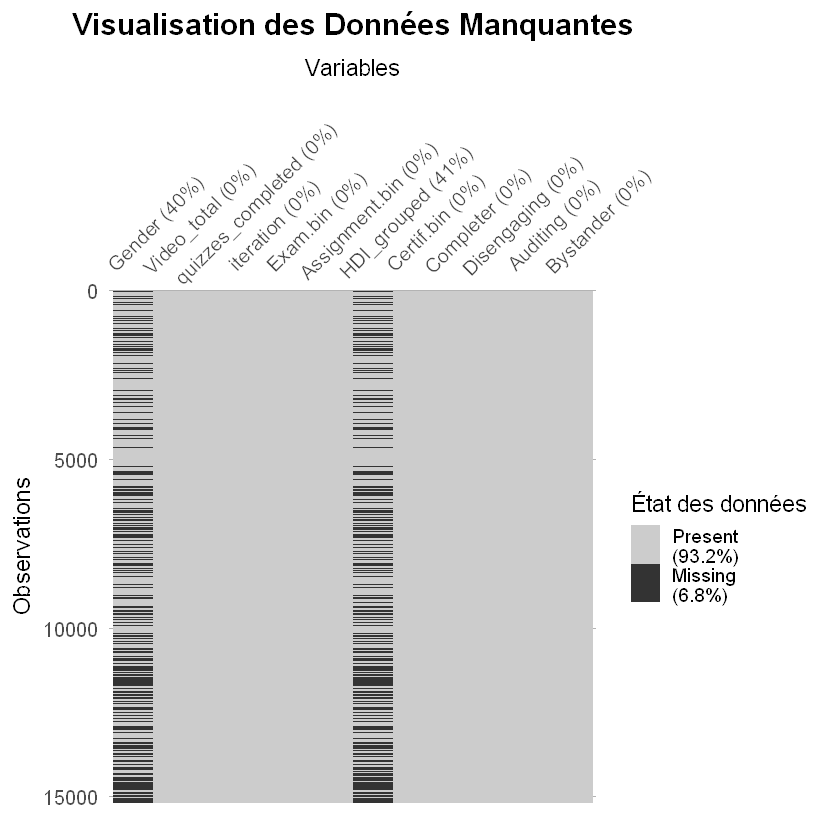

In [17]:
# Visualiser les données manquantes avec des séparateurs
vis_miss(df_MOOC) +
  labs(
    title = "Visualisation des Données Manquantes",
    x = "Variables",
    y = "Observations"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 0.2, size = 12),
    axis.text.y = element_text(size = 12),
    panel.grid.major.x = element_blank(), # Pas de lignes de séparation verticales
    panel.grid.major.y = element_line(color = "gray70", linewidth = 0.5), # Lignes entre les variables
    panel.grid.minor = element_blank(),
    plot.background = element_rect(fill = "white", color = "white")
  ) +
  guides(fill = guide_legend(title = "État des données"))



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 179.24, df = 2, p-value < 2.2e-16



ERROR: Error in if (split_vertical[i]) {: valeur manquante là où TRUE / FALSE est requis


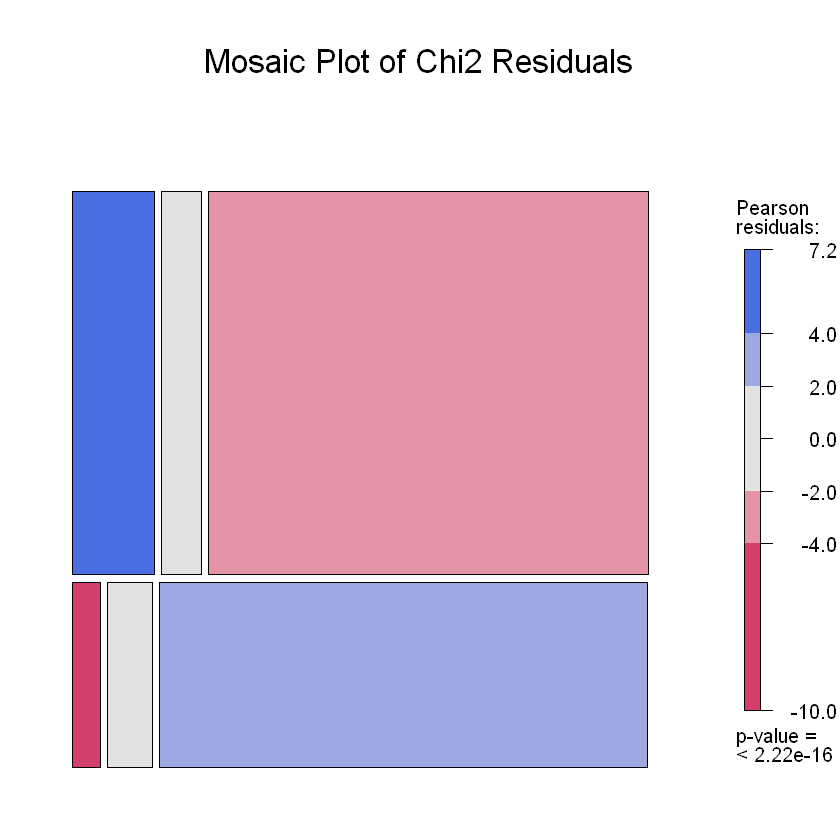

In [18]:
# 1. Créer le tableau de contingence entre Gender et HDI_grouped
contingency_table <- table(df_MOOC$Gender, df_MOOC$HDI_grouped)

# 2. Effectuer le test du chi²
chi2_test <- chisq.test(contingency_table)

# Afficher les résultats du test du chi²
print(chi2_test)

# 3. Résidus du test du chi²
residuals <- chi2_test$residuals

mosaic(
  contingency_table,
  shade = TRUE,       # Colore les cases en fonction des résidus
  legend = TRUE,      # Affiche une légende des couleurs
  main = "Mosaic Plot of Chi2 Residuals",
)


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 179.24, df = 2, p-value < 2.2e-16

X-squared 
 0.141509 


ERROR: Error in if (split_vertical[i]) {: valeur manquante là où TRUE / FALSE est requis


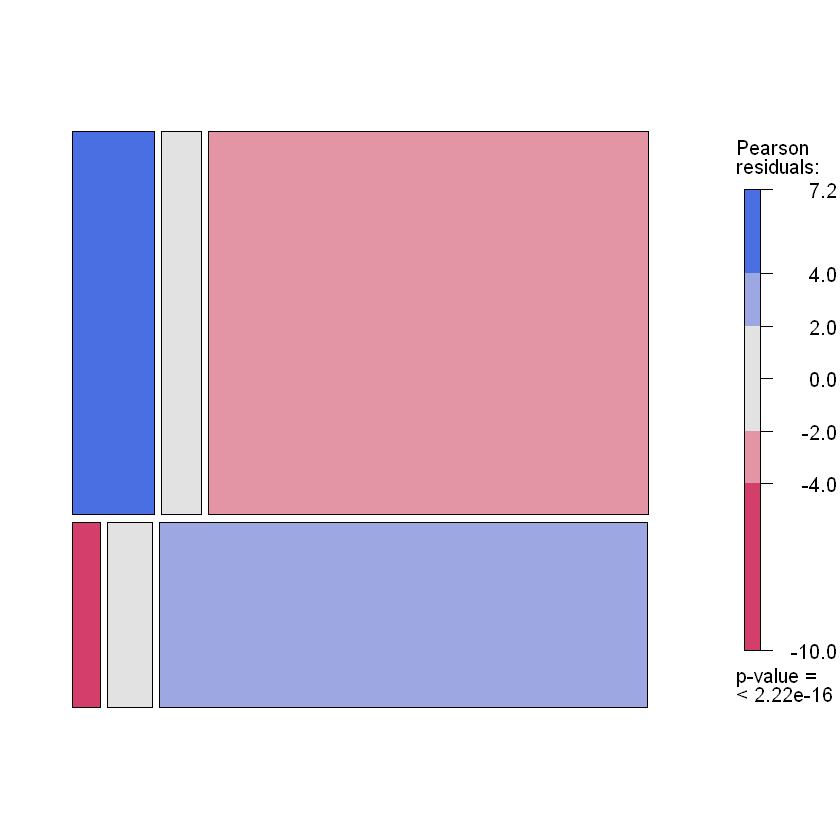

In [19]:
# Test du Chi2 pour l'indépendance entre Gender et HDI
chi_test <- chisq.test(contingency_table)
print(chi_test)

# Calcul du V de Cramer
cramer_v <- sqrt(chi_test$statistic / (sum(contingency_table) * min(dim(contingency_table) - 1)))
print(cramer_v)

# Création du mosaic plot sans les résidus
mosaic(
  contingency_table,
  shade = TRUE,       # Colore les cases en fonction des résidus
  legend = TRUE,
)

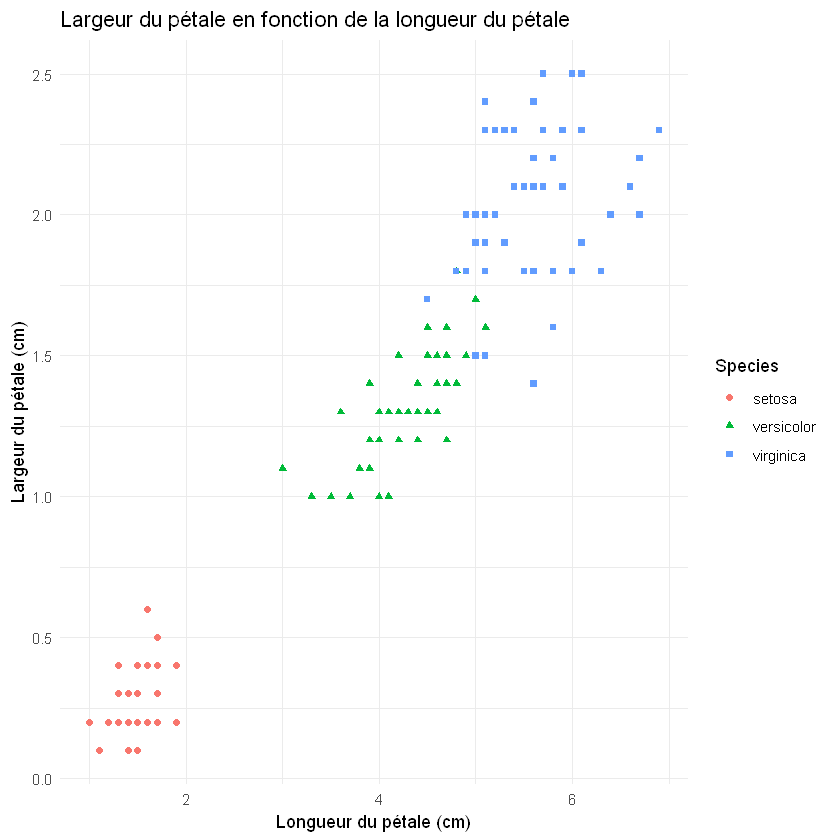

In [20]:
# Chargement des données Iris
data(iris)
# Représentation graphique : scatterplot
library(ggplot2)

ggplot(iris, aes(x = Petal.Length, y = Petal.Width, color = Species, shape = Species)) +
  geom_point() +
  labs(title = "Largeur du pétale en fonction de la longueur du pétale",
       x = "Longueur du pétale (cm)",
       y = "Largeur du pétale (cm)") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


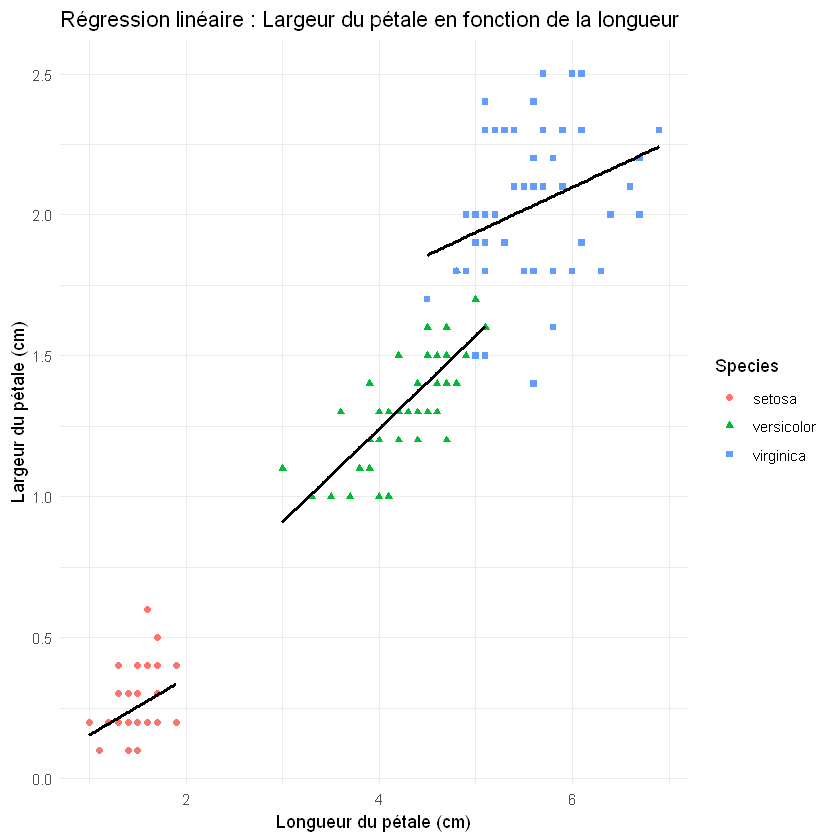

In [21]:
# Ajustement de la régression linéaire
model <- lm(Petal.Width ~ Petal.Length, data = iris)

# Affichage de la régression linéaire sur le graphique
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, color = Species, shape = Species)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "black") +  # Ajouter la régression linéaire
  labs(title = "Régression linéaire : Largeur du pétale en fonction de la longueur",
       x = "Longueur du pétale (cm)",
       y = "Largeur du pétale (cm)") +
  theme_minimal()


In [22]:
# Calcul du coefficient de corrélation de Pearson
cor(iris$Petal.Length, iris$Petal.Width)


[1] 0.9628654

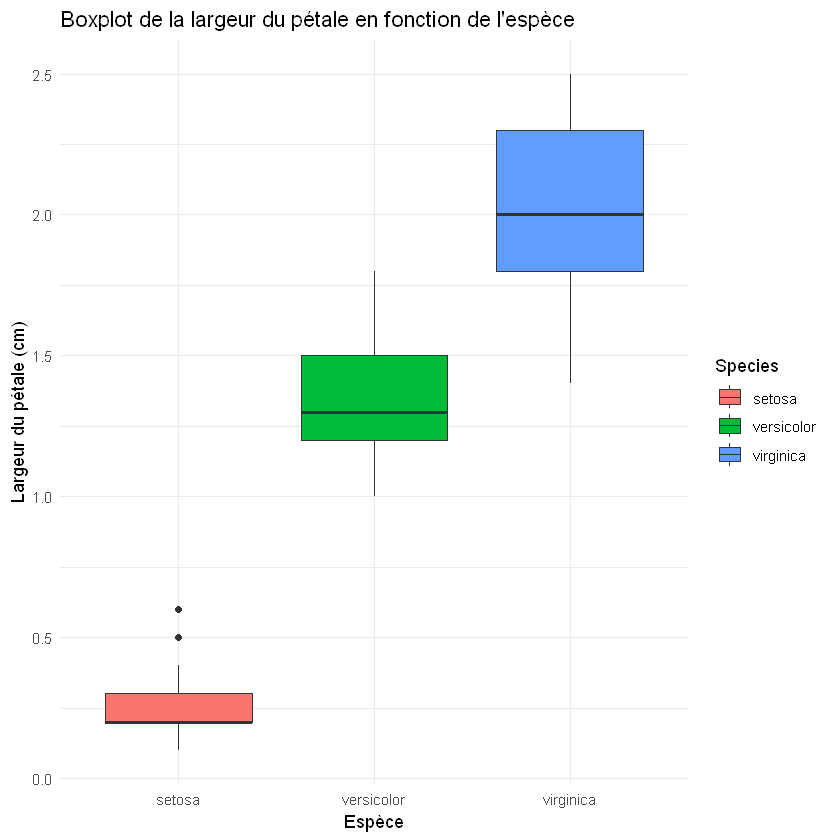

In [23]:
# Boxplot de la largeur du pétale en fonction de l'espèce
ggplot(iris, aes(x = Species, y = Petal.Width, fill = Species)) +
  geom_boxplot() +
  labs(title = "Boxplot de la largeur du pétale en fonction de l'espèce",
       x = "Espèce",
       y = "Largeur du pétale (cm)") +
  theme_minimal()


In [24]:
# ANOVA pour tester l'effet de l'espèce sur la largeur du pétale
anova_model <- aov(Petal.Width ~ Species, data = iris)

# Affichage des résultats de l'ANOVA
summary(anova_model)


             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  80.41   40.21     960 <2e-16 ***
Residuals   147   6.16    0.04                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [25]:
# Somme des carrés
anova_table <- summary(anova_model)[[1]]
anova_table


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Species,2,80.41333,40.20666667,960.0071,4.169446e-85
Residuals,147,6.15660,0.04188163,NA,NA


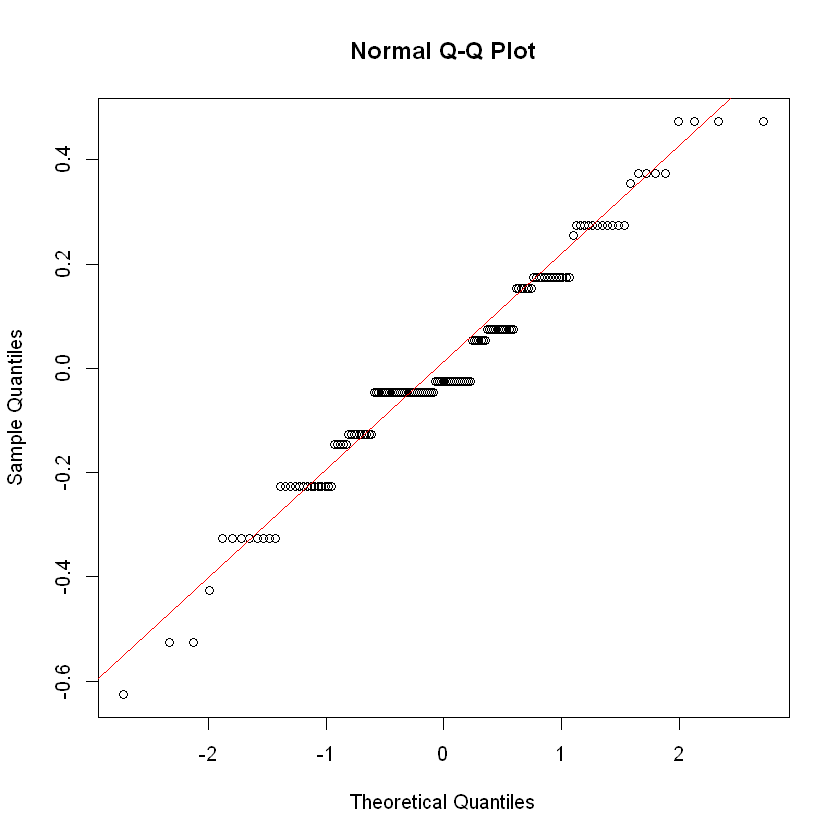

In [26]:
# QQ plot pour diagnostiquer le modèle
qqnorm(residuals(anova_model))
qqline(residuals(anova_model), col = "red")


In [27]:
# Test de Kruskal-Wallis comme test non-paramétrique
kruskal.test(Petal.Width ~ Species, data = iris)



	Kruskal-Wallis rank sum test

data:  Petal.Width by Species
Kruskal-Wallis chi-squared = 131.19, df = 2, p-value < 2.2e-16


5.2 Application aux données des MOOC

In [28]:
t_test_result <- t.test(Video_total ~ Gender, data = merged)
t_test_result


	Welch Two Sample t-test

data:  Video_total by Gender
t = -3.7603, df = 5879.2, p-value = 0.0001713
alternative hypothesis: true difference in means between group un homme and group une femme is not equal to 0
95 percent confidence interval:
 -1.4579783 -0.4587401
sample estimates:
 mean in group un homme mean in group une femme 
               13.17876                14.13712 


In [29]:
# Test non-paramétrique : Test de Mann-Whitney
wilcox_test_result <- wilcox.test(Video_total ~ Gender, data = merged)
wilcox_test_result


	Wilcoxon rank sum test with continuity correction

data:  Video_total by Gender
W = 8712151, p-value = 0.0004358
alternative hypothesis: true location shift is not equal to 0


In [30]:
# Corrélation de Pearson entre les variables 'Videos_Vues' et 'Quiz_Realisés'
pearson_corr <- cor(merged$Video_total, merged$quizzes_completed, method = "pearson")
pearson_corr

[1] 0.8056316

In [31]:
# Corrélation de Spearman entre les variables 'Videos_Vues' et 'Quiz_Realisés'
spearman_corr <- cor(merged$Video_total , merged$quizzes_completed, method = "spearman")
spearman_corr


[1] 0.7998543

In [32]:
# Modèle de régression linéaire
lm_model <- lm(Video_total ~ quizzes_completed, data = merged)
summary(lm_model)



Call:
lm(formula = Video_total ~ quizzes_completed, data = merged)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.0309  -0.9266  -0.9266   3.9691  28.0734 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.92661    0.07081   13.09   <2e-16 ***
quizzes_completed  4.02087    0.02400  167.55   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.495 on 15180 degrees of freedom
Multiple R-squared:  0.649,	Adjusted R-squared:  0.649 
F-statistic: 2.807e+04 on 1 and 15180 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


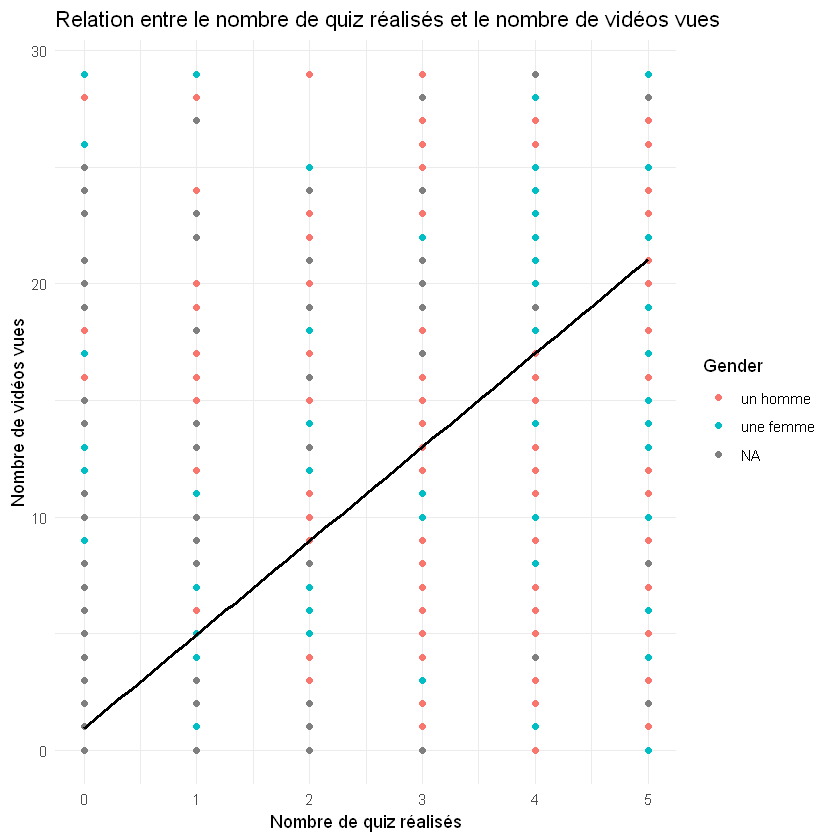

In [33]:
# Scatterplot avec régression linéaire
library(ggplot2)
ggplot(merged, aes(x = quizzes_completed, y = Video_total)) +
  geom_point(aes(color = Gender)) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(title = "Relation entre le nombre de quiz réalisés et le nombre de vidéos vues",
       x = "Nombre de quiz réalisés",
       y = "Nombre de vidéos vues") +
  theme_minimal()


In [34]:
# Modèle linéaire : effet de l'HDI et du genre
mod <- lm(Video_total ~ HDI_grouped + Gender - 1, data = merged)

# Résumé du modèle
summary(mod)

# ANOVA du modèle
anova_result <- anova(mod)
anova_result


Call:
lm(formula = Video_total ~ HDI_grouped + Gender - 1, data = merged)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.917  -9.757  -2.756  13.083  22.713 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
HDI_groupedB      6.2868     0.3455   18.19   <2e-16 ***
HDI_groupedI     10.4234     0.4367   23.87   <2e-16 ***
HDI_groupedTH    14.7565     0.1566   94.23   <2e-16 ***
Genderune femme   0.1607     0.2511    0.64    0.522    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.03 on 8947 degrees of freedom
  (6231 observations effacées parce que manquantes)
Multiple R-squared:  0.6105,	Adjusted R-squared:  0.6103 
F-statistic:  3506 on 4 and 8947 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
HDI_grouped,3,1.706154e+06,568717.99275,4674.5466879,0.000000
Gender,1,4.980383e+01,49.80383,0.4093599,0.522311
Residuals,8947,1.088516e+06,121.66270,NA,NA


On obtient ces Degrés de liberté car il existe 3 groupe pour l'HDI donc df=nbGroupe - 1 ==> dfHDI = 2 & dfGENDER = 1

In [35]:
# Modèle avec interaction entre Genre et HDI
mod_interaction <- lm(Video_total ~ Gender * HDI_grouped, data = merged)
anova_interaction <- anova(mod_interaction)
summary(mod_interaction)


Call:
lm(formula = Video_total ~ Gender * HDI_grouped, data = merged)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.987  -9.719  -2.719  13.013  22.767 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     6.2333     0.3712  16.794  < 2e-16 ***
Genderune femme                 0.5354     0.9825   0.545    0.586    
HDI_groupedI                    4.7111     0.6476   7.275 3.76e-13 ***
HDI_groupedTH                   8.4854     0.4045  20.980  < 2e-16 ***
Genderune femme:HDI_groupedI   -1.8618     1.3300  -1.400    0.162    
Genderune femme:HDI_groupedTH  -0.2671     1.0193  -0.262    0.793    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.03 on 8945 degrees of freedom
  (6231 observations effacées parce que manquantes)
Multiple R-squared:  0.06226,	Adjusted R-squared:  0.06173 
F-statistic: 118.8 on 5 and 8945 DF,  p-value: < 2.2e-16


In [36]:
# Kruskal-Wallis sur l'interaction entre Genre et HDI
merged$Group <- interaction(merged$Gender, merged$HDI_grouped)
kruskal_test <- kruskal.test(Video_total ~ Group, data = merged)
kruskal_test


	Kruskal-Wallis rank sum test

data:  Video_total by Group
Kruskal-Wallis chi-squared = 565.43, df = 5, p-value < 2.2e-16


6. Regression Logistique

In [37]:
# Modèle de régression logistique
mod_logit <- glm(Exam.bin ~ Gender + HDI_grouped, data = merged, family = "binomial")

# Résumé du modèle
summary_mod <- summary(mod_logit)

# Calcul des Odds Ratios, intervalles de confiance et p-values
odds_ratios <- exp(coef(mod_logit))  # Exponentiation des coefficients
conf_int <- exp(confint(mod_logit))  # Intervalles de confiance
p_values <- coef(summary(mod_logit))[, 4]  # Extraction des p-values

# Création de la table des résultats
results_table <- data.frame(
  Variable = c("Référence", "Gender (Femme)", "HDI (I)", "HDI (TH)"),
  OR = round(odds_ratios, 3),
  CI_lower = round(conf_int[, 1], 3),
  CI_upper = round(conf_int[, 2], 3),
  p_value = p_values
)

# Ajout des étoiles pour les p-values
results_table$Signif <- ifelse(results_table$p_value < 0.001, "***",
                      ifelse(results_table$p_value < 0.01, "**",
                      ifelse(results_table$p_value < 0.05, "*", "ns")))

# Format final
results_table[1, "OR"] <- "Réf"  # La modalité de référence
print(results_table)


Waiting for profiling to be done...



                      Variable    OR CI_lower CI_upper      p_value Signif
(Intercept)          Référence   Réf    0.139    0.197 2.617757e-90    ***
Genderune femme Gender (Femme) 1.122    1.001    1.256 4.721344e-02      *
HDI_groupedI           HDI (I) 1.119    0.852    1.465 4.155481e-01     ns
HDI_groupedTH         HDI (TH) 1.372    1.144    1.656 7.860479e-04    ***


Le genre "Femme" a un Odds Ratio de 1.122, ce qui signifie que les femmes ont 12.2 % plus de chances de réussite que les hommes, bien que cela ne soit pas statistiquement très significatif (p-value < 0.05).

Le HDI Intermédiaire a un Odds Ratio de 1.119, mais il n'est pas statistiquement significatif (p-value > 0.05)

Le HDI Très Haut a un Odds Ratio de 1.372, et il est statistiquement significatif (p-value < 0.001)

L'étude précédente avec le nombre de vidéos vues avait montré que cette donnée variait et que cette effet était statistiquement significatif selon l'HDI mais pas selon le Genre

l'Odd ratio permet de mesurer l'association entre les variables explicatives (ici Genre et HDI) et la variable dépendante binaire (ici la réussite ou non). L'Odd Ratio se calcule avec le nombre d'événements alors que le Risk Ratio se calcule à partir des probabilités d'un événement entre 2 groupes. Lorsque les probabilités d’un événement sont faibles, l’OR et le RR convergent et donnent des résultats similaires. Lorsque les probabilités d’un événement sont élevées, l’OR à tendance à exagérer l’association par rapport au RR.

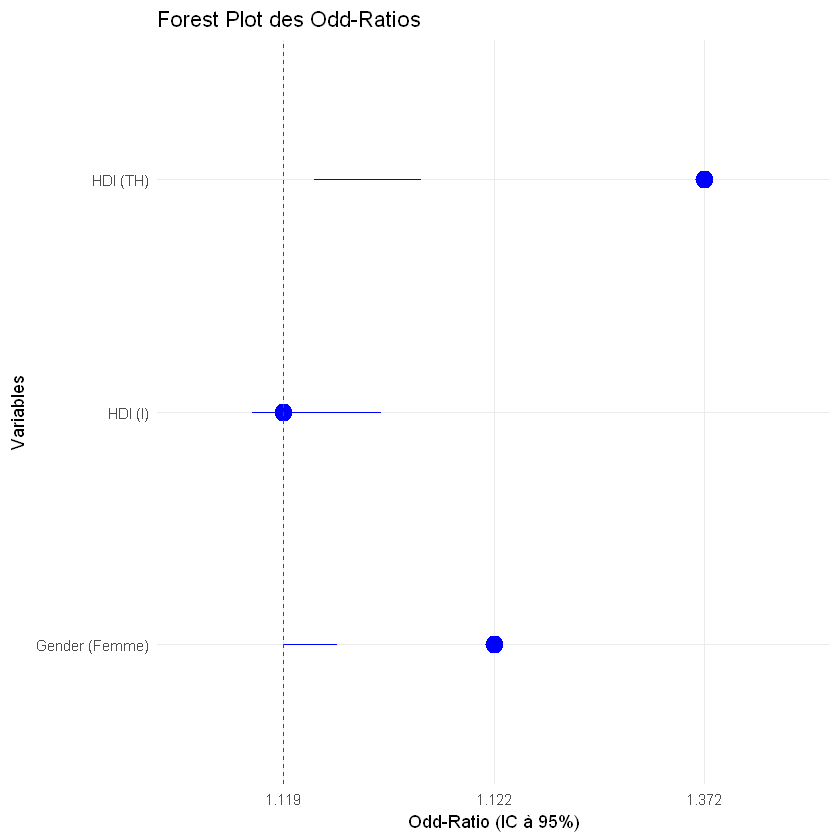

In [38]:
# Préparation des données pour le forest plot
forest_data <- results_table[-1, ]  # Exclure la référence
forest_data$Variable <- factor(forest_data$Variable, levels = forest_data$Variable)

# Création du forest plot
ggplot(forest_data, aes(x = Variable, y = OR, ymin = CI_lower, ymax = CI_upper)) +
  geom_pointrange(size = 1, color = "blue") +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") +
  coord_flip() +
  labs(title = "Forest Plot des Odd-Ratios",
       x = "Variables",
       y = "Odd-Ratio (IC à 95%)") +
  theme_minimal()


Notes de Maths & Prix

In [39]:
notes_maths <- read_csv("Data//maths_competition_awards_data.csv")

Rows: 200 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): Awards, Math Score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [40]:
str(notes_maths)

spc_tbl_ [200 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Awards    : num [1:200] 0 0 0 0 0 0 0 0 0 0 ...
 $ Math Score: num [1:200] 43 38 41 33 39 43 35 41 36 38 ...
 - attr(*, "spec")=
  .. cols(
  ..   Awards = col_double(),
  ..   `Math Score` = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Joining with `by = join_by(Awards, `Math Score`)`


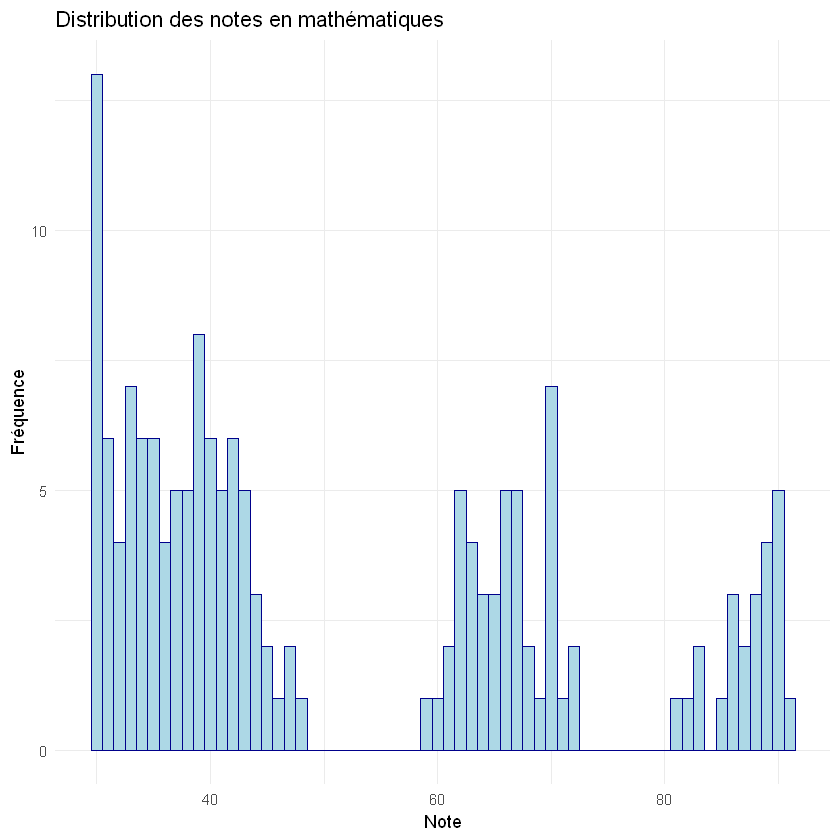

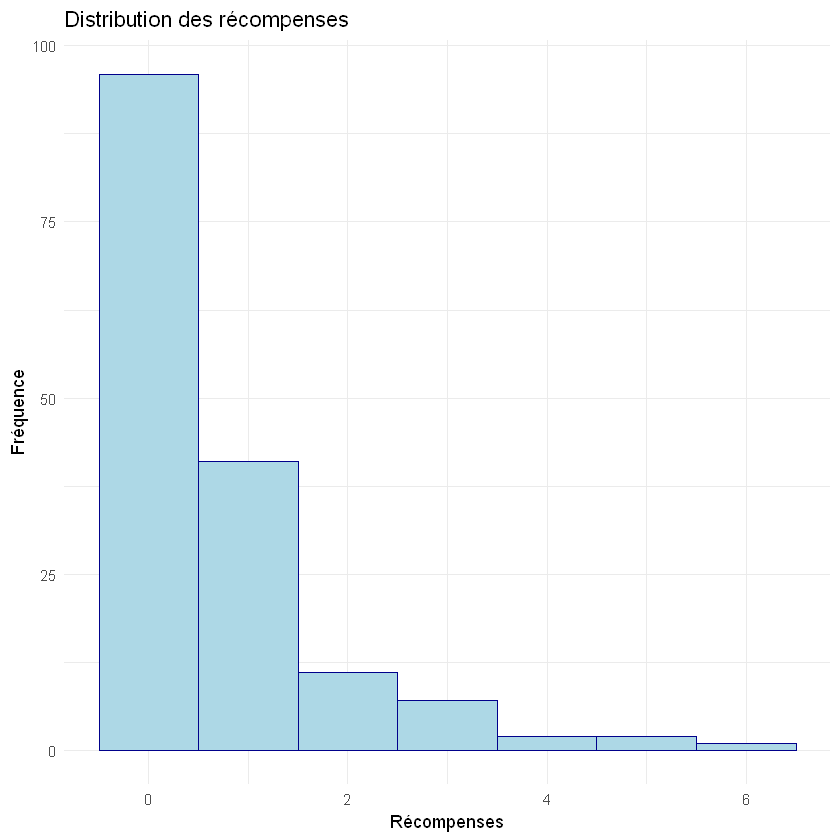

In [41]:
# 6.2 Traitement de données de comptage-type : la loi de Poisson

# Sélection aléatoire de 80% des données pour l'entraînement
set.seed(123)  # Pour la reproductibilité
training_data <- notes_maths %>% sample_frac(0.8)
test_data <- anti_join(notes_maths, training_data)

# Distribution des notes en mathématiques
ggplot(training_data, aes(x = `Math Score`)) +
    geom_histogram(binwidth = 1, fill = "lightblue", color = "darkblue") +
    labs(title = "Distribution des notes en mathématiques",
             x = "Note",
             y = "Fréquence") +
    theme_minimal()

# Distribution des récompenses
ggplot(training_data, aes(x = Awards)) +
    geom_histogram(binwidth = 1, fill = "lightblue", color = "darkblue") +
    labs(title = "Distribution des récompenses",
             x = "Récompenses",
             y = "Fréquence") +
    theme_minimal()

# Modèle de régression de Poisson
poisson_model <- glm(Awards ~ `Math Score`, data = training_data, family = "poisson")

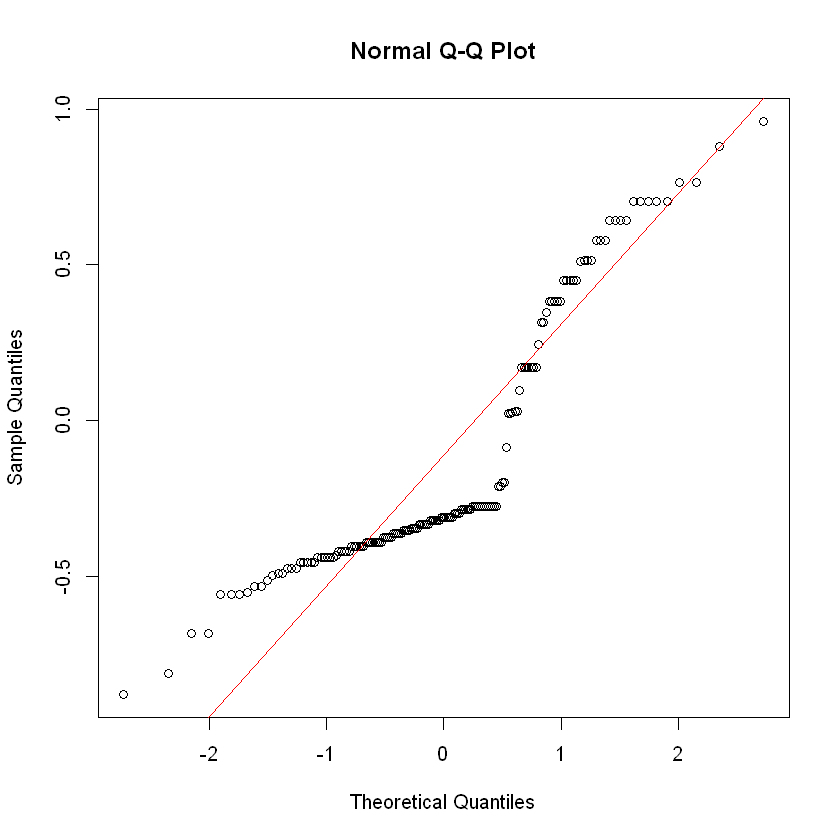

In [42]:
# Diagnostic du modèle
qqnorm(residuals(poisson_model))
qqline(residuals(poisson_model), col = "red")

Un QQplot est un graphique utilisé pour comparer la distribution d'une variable avec une distribution théorique. Les points alignés sur la diagonale indiquent que les données suivent bien la distribution attendue. Les écarts par rapport à cette diagonale signalent des déviations dans la distribution des données.

In [43]:
# Prédictions sur les données d'entraînement
training_data$predicted <- predict(poisson_model, type = "response")

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


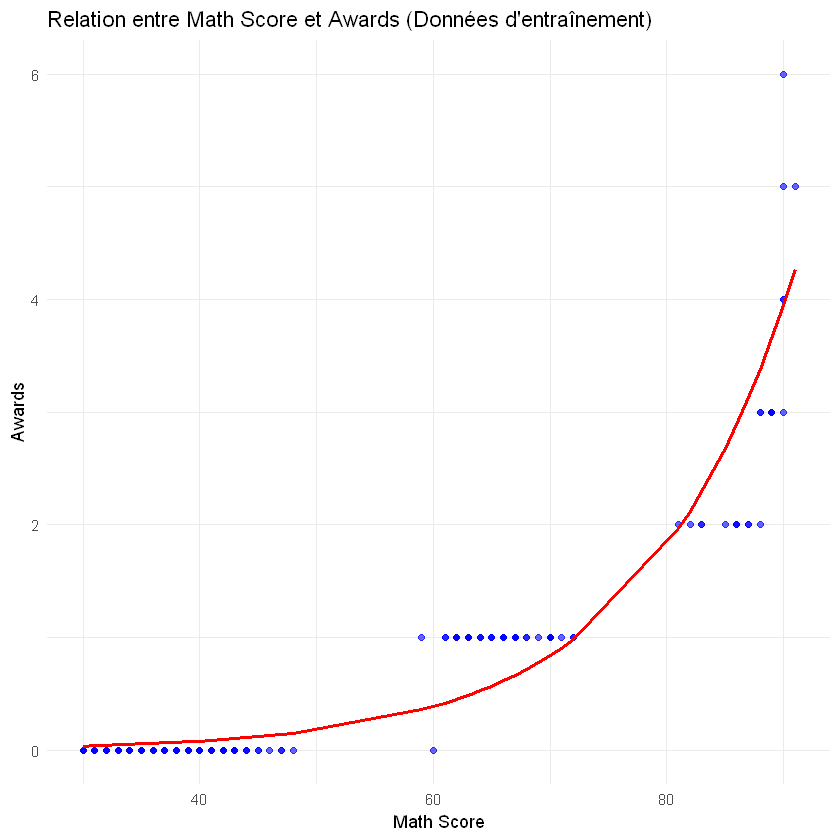

In [44]:
# Scatter plot avec données empiriques et prédictions
ggplot(training_data, aes(x = `Math Score`, y = Awards)) +
  geom_point(color = "blue", alpha = 0.6) + # Points pour les données empiriques
  geom_line(aes(y = predicted), color = "red", size = 1) + # Ligne pour les prédictions
  labs(
    title = "Relation entre Math Score et Awards (Données d'entraînement)",
    x = "Math Score",
    y = "Awards"
  ) +
  theme_minimal()


Le type d'erreur convenable ici est la Déviance residuelle

In [45]:
# Prédictions sur les données de test
test_data$predicted <- predict(poisson_model, newdata = test_data, type = "response")

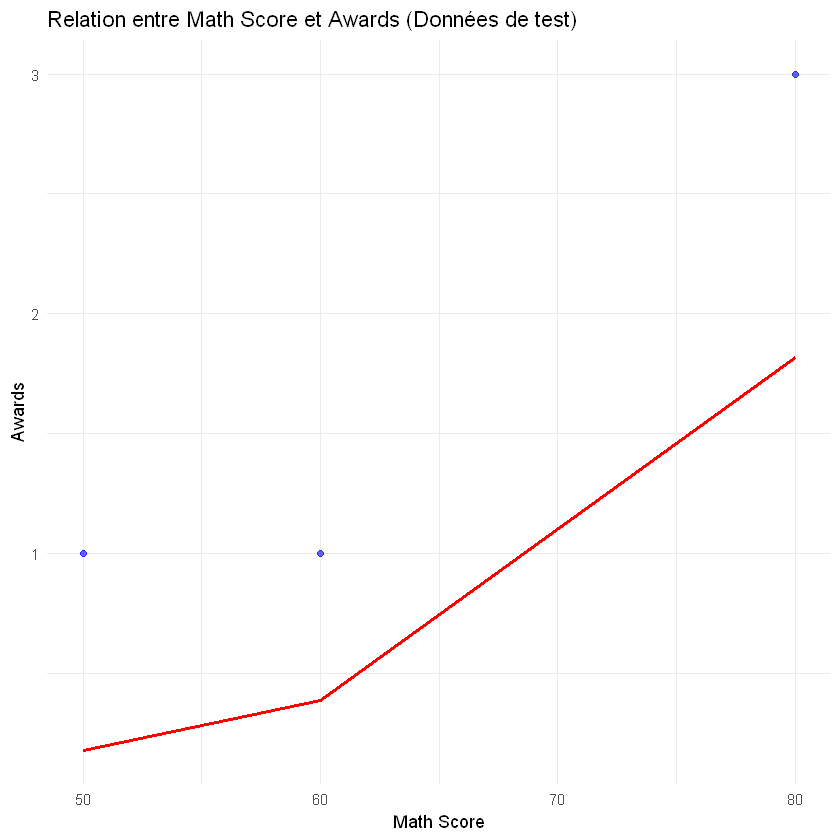

In [46]:
# Scatter plot avec données empiriques et prédictions pour les données de test
ggplot(test_data, aes(x = `Math Score`, y = Awards)) +
  geom_point(color = "blue", alpha = 0.6) + # Points pour les données empiriques
  geom_line(aes(y = predicted), color = "red", size = 1) + # Ligne pour les prédictions
  labs(
    title = "Relation entre Math Score et Awards (Données de test)",
    x = "Math Score",
    y = "Awards"
  ) +
  theme_minimal()

In [47]:
# Calcul de l'erreur quadratique moyenne (MSE) pour les données d'entraînement
mse_training <- mean((training_data$Awards - training_data$predicted)^2)

# Calcul de l'erreur quadratique moyenne (MSE) pour les données de test
mse_test <- mean((test_data$Awards - test_data$predicted)^2)

# Affichage des résultats
cat("MSE sur les données d'entraînement :", mse_training, "\n")
cat("MSE sur les données de test :", mse_test, "\n")

MSE sur les données d'entraînement : 0.1469121 
MSE sur les données de test : 0.8163145 


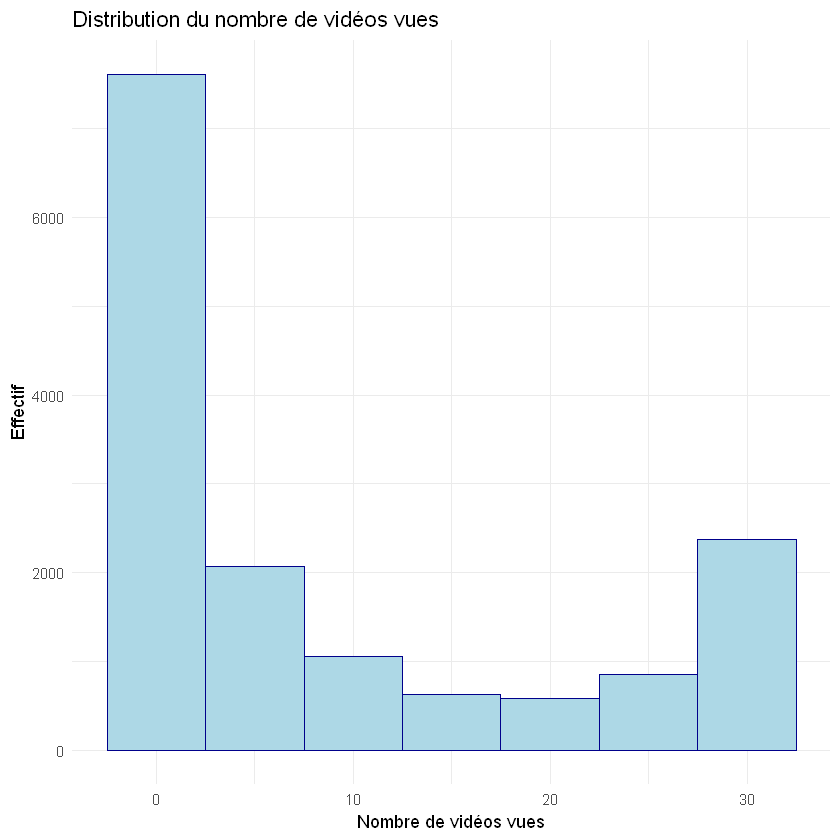

In [48]:
ggplot(df_MOOC, aes(x = Video_total)) +
    geom_histogram(binwidth = 5, fill = "lightblue", color = "darkblue") +
    labs(
        title = "Distribution du nombre de vidéos vues",
        x = "Nombre de vidéos vues",
        y = "Effectif"
    ) +
    theme_minimal()

Le modèle est Zero-inflated et on a de la sur-dispertion
Dans le contexte d’un MOOC, la variance du "nombre de vidéos vues" est souvent beaucoup plus grande que la moyenne qui est dû à des comportements hétérogènes et beaucoup de compte sont créer mais n'ont pas d'activités.

C'est un problème pour l'analyse on doit donc utiliser des modèles Poisson spécifiques

In [49]:
# Modèle binomial négatif
library(MASS)
nb_model <- glm.nb(Video_total ~ quizzes_completed + Gender, data = merged)



Attachement du package : 'MASS'


L'objet suivant est masqué depuis 'package:dplyr':

    select




In [59]:
# Ajustement du modèle GLM avec une loi de Poisson
poisson_model <- glm(Video_total ~ Gender + HDI_grouped, 
                     family = poisson(link = "log"), 
                     data = merged)

In [71]:
zero_infalted_poisson <- zeroinfl(Video_total ~ Gender + HDI_grouped | 1, data = merged, dist = "poisson")

In [82]:
quasi_poisson_model <- zeroinfl(Video_total ~ quizzes_completed + Gender, data = merged, dist = "poisson")

In [68]:
library(pscl)

# Ajuster un modèle Zero Inflated Negative Binomial
zinb_model <- zeroinfl(Video_total ~ quizzes_completed + Gender | 1, 
                       data = merged, 
                       dist = "negbin")

# Résumé du modèle
summary(zinb_model)


Call:
zeroinfl(formula = Video_total ~ quizzes_completed + Gender | 1, data = merged, 
    dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.3719 -0.8417  0.1948  0.4742  9.8960 

Count model coefficients (negbin with log link):
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       1.142340   0.019999  57.120  < 2e-16 ***
quizzes_completed 0.394510   0.004633  85.153  < 2e-16 ***
Genderune femme   0.065923   0.016301   4.044 5.25e-05 ***
Log(theta)        0.989929   0.025121  39.406  < 2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.48175    0.05847  -42.44   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Theta = 2.691 
Number of iterations in BFGS optimization: 15 
Log-likelihood: -2.985e+04 on 5 Df

In [83]:
# Comparaison des AIC
AIC(poisson_model, zero_infalted_poisson, quasi_poisson_model, nb_model, zinb_model)

Warning message in AIC.default(poisson_model, zero_infalted_poisson, quasi_poisson_model, :
"tous les modèles n'ont pas été ajustés sur le même nombre d'observations"


,df,AIC
,<dbl>,<dbl>
poisson_model,4,129403.87
zero_infalted_poisson,5,101955.54
quasi_poisson_model,6,72960.71
nb_model,4,60404.09
zinb_model,5,59707.48


On a comparé les AIC (Akaike Informational Criteria) pour vérifier quel était le meilleur modèle. Le ZINB est donc le plus ajusté.

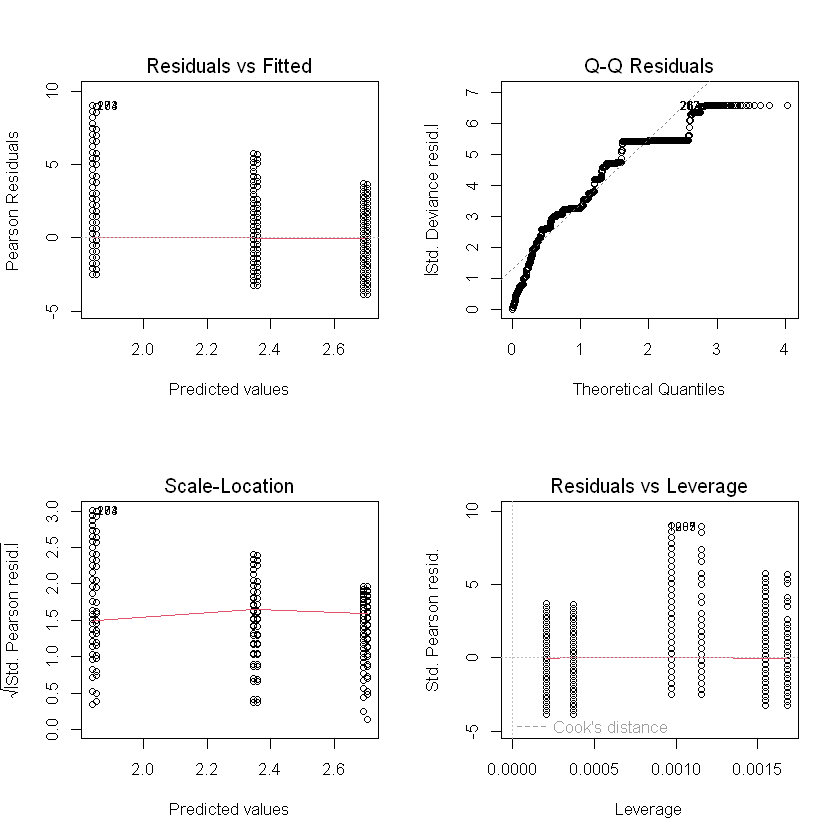

In [52]:
# Graphes de diagnostic pour le modèle ajusté
par(mfrow = c(2, 2)) # Afficher 4 graphiques sur une même page
plot(poisson_model)

QQ-Plot : Les points doivent être alignés le long de la ligne diagonale, des déviations indiquent une absence de normalité.

Homoscédasticité : Elle correspond à une variance constante des résidus autour de zéro.

Si la variable était normalement distribuée, les résidus seraient parfaitement centrés autour de zéro (QQ-Plot aligné, homoscédasticité parfaite)

In [53]:
# Résumé du modèle
summary(poisson_model)


Call:
glm(formula = Video_total ~ Gender + HDI_grouped, family = poisson(link = "log"), 
    data = merged)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.840437   0.012434 148.022   <2e-16 ***
Genderune femme 0.011522   0.006091   1.892   0.0585 .  
HDI_groupedI    0.504951   0.017290  29.206   <2e-16 ***
HDI_groupedTH   0.851001   0.012835  66.301   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 103480  on 8950  degrees of freedom
Residual deviance:  97166  on 8947  degrees of freedom
  (6231 observations effacées parce que manquantes)
AIC: 129404

Number of Fisher Scoring iterations: 5


On remarque que l'effet du genre n'est pas significatif (p-value > 0.05) et que la taille de l'effet est très faible

l'effet de l'HDI est lui statistiquement significatif (p-value < 0.001). Les apprenants des pays à HDI intermédiaire regardent environ 66 % de vidéos de plus que ceux des pays à faible HDI. Ceux des pays à très haut HDI regardent plus du double des vidéos.

7 - Exercices d’approfondissement : de l’ANOVA en autonomie à la multicolinéarité


In [54]:
price_pred <- read_csv("Data//scrap price.csv")

Rows: 205 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): name, fueltypes, aspiration, doornumbers, carbody, drivewheels, en...
dbl (16): ID, symboling, wheelbase, carlength, carwidth, carheight, curbweig...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [55]:
str(price_pred)

spc_tbl_ [205 × 26] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID              : num [1:205] 1 2 3 4 5 6 7 8 9 10 ...
 $ symboling       : num [1:205] 3 3 1 2 2 2 1 1 1 0 ...
 $ name            : chr [1:205] "alfa-romero giulia" "alfa-romero stelvio" "alfa-romero Quadrifoglio" "audi 100 ls" ...
 $ fueltypes       : chr [1:205] "gas" "gas" "gas" "gas" ...
 $ aspiration      : chr [1:205] "std" "std" "std" "std" ...
 $ doornumbers     : chr [1:205] "two" "two" "two" "four" ...
 $ carbody         : chr [1:205] "convertible" "convertible" "hatchback" "sedan" ...
 $ drivewheels     : chr [1:205] "rwd" "rwd" "rwd" "fwd" ...
 $ enginelocation  : chr [1:205] "front" "front" "front" "front" ...
 $ wheelbase       : num [1:205] 88.6 88.6 94.5 99.8 99.4 ...
 $ carlength       : num [1:205] 169 169 171 177 177 ...
 $ carwidth        : num [1:205] 64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ carheight       : num [1:205] 48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight 

In [56]:
# Étape 2 : Créer un modèle initial
modele_initial <- lm(price ~ ., data = price_pred)

# Identifier les coefficients aliasés
alias_info <- alias(modele_initial)$Complete
if (!is.null(alias_info)) {
  print("Variables aliasées détectées :")
  print(rownames(alias_info))
  # Supprimer les variables aliasées
  alias_names <- rownames(alias_info)
  price_pred <- price_pred[, !colnames(price_pred) %in% alias_names]
}

# Recalculer le modèle sans variables aliasées
modele_omnibus <- lm(price ~ ., data = price_pred)

# Étape 3 : Calculer le VIF
tryCatch({
  vif_values <- vif(modele_omnibus)
  print("VIF initial :")
  print(vif_values)
  
  # Supprimer les variables avec VIF > 10
  while (any(vif_values > 10)) {
    # Supprimer la variable avec le VIF le plus élevé
    variable_to_remove <- names(vif_values)[which.max(vif_values)]
    print(paste("Suppression de la variable :", variable_to_remove))
    price_pred <- price_pred[, !colnames(price_pred) %in% variable_to_remove]
    
    # Recalculer le modèle et les VIF
    modele_omnibus <- lm(price ~ ., data = price_pred)
    vif_values <- vif(modele_omnibus)
  }
  
  print("VIF final :")
  print(vif_values)
}, error = function(e) {
  print("Erreur dans le calcul du VIF, vérifier les données ou la structure du modèle.")
})

[1] "Variables aliasées détectées :"
 [1] "carbodywagon"         "enginetypedohcv"      "enginetypel"         
 [4] "enginetypeohcf"       "cylindernumberfive"   "cylindernumbersix"   
 [7] "cylindernumberthree"  "cylindernumbertwelve" "cylindernumbertwo"   
[10] "fuelsystem4bbl"       "fuelsystemidi"        "fuelsystemmfi"       
[1] "Erreur dans le calcul du VIF, vérifier les données ou la structure du modèle."


Warning message:
"le package 'corrplot' a été compilé avec la version R 4.4.2"
corrplot 0.95 loaded



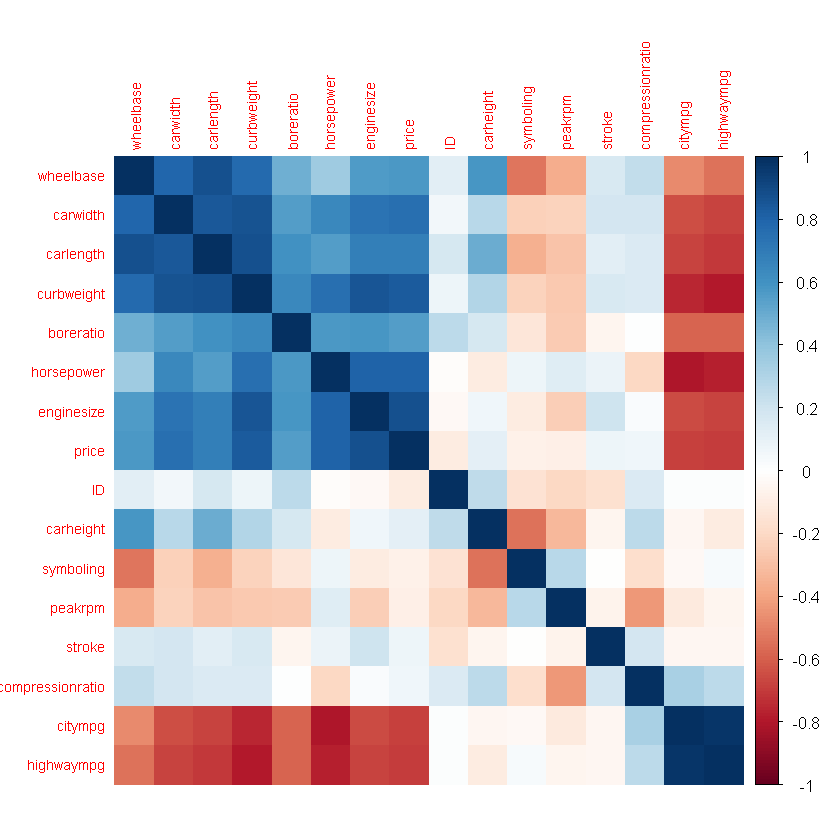

In [57]:
library(corrplot)
# Sélectionner uniquement les variables numériques
numeric_vars <- select_if(price_pred, is.numeric)

# Calculer la matrice de corrélation
cor_matrix <- cor(numeric_vars, use = "complete.obs")

# Afficher le corrélogramme
corrplot(cor_matrix, method = "color", order = "hclust", tl.cex = 0.7)
